In [43]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import os
import seaborn as sns


In [44]:
# Read input images and assign labels based on folder names
print(os.listdir("Datasets/"))

SIZE = 224  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("Datasets/train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

['Test', 'Train', 'validation']
ben_afflek
Datasets/train\ben_afflek\httpcsvkmeuaeccjpg.jpg
Datasets/train\ben_afflek\httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg
Datasets/train\ben_afflek\httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg
Datasets/train\ben_afflek\httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg
Datasets/train\ben_afflek\httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg
Datasets/train\ben_afflek\httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg
Datasets/train\ben_afflek\httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg
Datasets/train\ben_afflek\httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg
Datasets/train\ben_afflek\httptrwebimgacstanetcxbdddmediasnmediajpg.jpg
Datasets/train\ben_afflek\httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg
Datasets/train\ben_afflek\httpwwwallposterscomimagesPostersPFjpg.jpg
Datasets/train\ben_afflek\http

In [45]:
test_images = []
test_labels = [] 

for directory_path in glob.glob("Datasets/train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

ben_afflek
Datasets/train\ben_afflek\httpcsvkmeuaeccjpg.jpg
Datasets/train\ben_afflek\httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg
Datasets/train\ben_afflek\httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg
Datasets/train\ben_afflek\httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg
Datasets/train\ben_afflek\httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg
Datasets/train\ben_afflek\httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg
Datasets/train\ben_afflek\httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg
Datasets/train\ben_afflek\httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg
Datasets/train\ben_afflek\httptrwebimgacstanetcxbdddmediasnmediajpg.jpg
Datasets/train\ben_afflek\httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg
Datasets/train\ben_afflek\httpwwwallposterscomimagesPostersPFjpg.jpg
Datasets/train\ben_afflek\httpwwwfilmscoopitcgibinattoriBENAFF

In [46]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
print(train_labels_encoded)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot)
print(y_train_one_hot[1])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]


In [47]:
from glob import glob
folders = glob('Datasets/Train/*')
len(folders)

5

In [48]:
#Load model wothout classifier/fully connected layers
IMAGE_SIZE = [224, 224]
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))


#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
      layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [49]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)
print("first", feature_extractor)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
print("second", features)

X_for_RF = features #This is our X input to RF
print(X_for_RF)


first [[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.75596285e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.18965650e-01
    6.32689118e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.36518383e-01
    7.95169890e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 3.31611753e-01 ... 0.00000000e+00
    8.79498124e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 3.57178062e-01 ... 0.00000000e+00
    9.20849919e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.12700427e-01 0.00000000e+00]]

  [[7.58760720e-02 0.00000000e+00 9.02616024e-01 ... 0.00000000e+00
    1.39131176e+00 0.00000000e+00]
   [9.93478060e-01 0.00000000e+00 5.02059281e-01 ... 2.67336398e-01
    5.50464988e-01 0.00000000e+00]
   [9.92231369e-01 0.00000000e+00 1.90008312e-01 ... 2.52675682e-01
    6.03865385e-01 0.00000000e+00]
   ...
   [4.73510563e-01 0.00000000e+00 3.48110408e-01 ..

In [50]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
print("first", prediction_RF)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)
print("second", prediction_RF)

first [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
second ['ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'Brad pitt'
 'Brad pitt' 'Brad pitt' 'Brad pitt' 'Brad pitt' 'Brad pitt' 'Brad pitt'
 'Brad pitt' 'Brad pitt' 'Brad pitt' 'Brad pitt' 'Brad pitt' 'Brad pitt'
 'Brad pitt' 'Brad pitt' 'Brad pitt' 'Brad pitt' 'Brad pitt' 'Brad pitt'
 'Brad pitt' 'Brad pitt' 'Brad pitt' 'Brad pitt' 'Brad pitt' 'Brad pitt'
 'Brad pitt' 'Brad pitt' 'Brad pitt' 'chris' 'chris' 'chris' 'chris'
 'chris' 'chris' 'chris' 'chris' 'chris' 'chris' 'chris' 'c

Accuracy =  1.0
[[ 28   0   0   0   0]
 [  0  14   0   0   0]
 [  0   0  21   0   0]
 [  0   0   0  19   0]
 [  0   0   0   0 100]]


<AxesSubplot:>

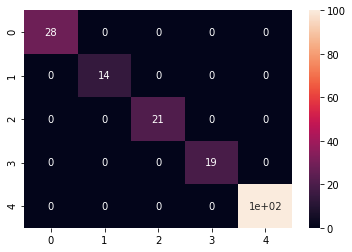

In [51]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
print(cm)
sns.heatmap(cm, annot=True)


56
The prediction for this image is:  ['chris']
The actual label for this image is:  chris


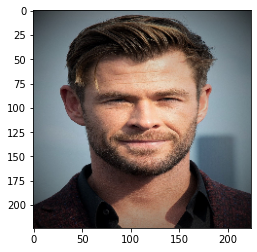

In [57]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
print(n)
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])